In [2]:

import pandas as pd
import json
from pandas.io.json import json_normalize  
import numpy as np
from tabulate import tabulate

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def stats_analysis(df):
    df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
    df3 = df2.loc[~df2.index.str.contains("None")]
    
    df_time_access = pd.DataFrame(df3.time_access.values.tolist(), index=df3.index.values)
    df_time_access = df_time_access.fillna(0)
    
    counts = df_time_access.values.flatten()
    counts2 = counts[(counts>0) & (counts<120)]
    
    ratios = []
    cl = len(counts2)
    for i in range(1, 11):
        ratios.append(len(counts2[counts2==i])/cl)
        
        
    step_groupings = []
    cs = sum(counts2)
    for i in range(1, 21):
        step_groupings.append((i, sum(counts2[counts2>i])/cs))
        
    step_groupings = np.array(step_groupings)
    l1, l2 = zip(*step_groupings)
    print(tabulate(step_groupings))
    
    
    step_groupings_pd = pd.DataFrame()
    step_groupings_pd['bound'] = l1
    step_groupings_pd['fraction'] = l2

    print("avg per step")
    print(np.average(counts2))
    
    
    print("median per step")
    print(np.median(counts2))
    
    plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
    plt.xlabel("visits per step")
    plt.ylabel("fraction of total visits")
    plt.show()
    
    
    plt.bar(range(1,11), np.array(ratios))
    plt.xlabel("traversals per step")
    plt.ylabel("fraction of total traversals")
    plt.show()
    
    
    plt.hist(counts2, bins=int(max(counts2)))
    plt.xlabel("traversals per step")
    plt.ylabel("count")
    plt.show()
    
    
    plt.plot(df2.groupby('source_neighbors').mean()['count'])
    plt.xlabel("count of traversals")
    plt.ylabel("source node neighbors")
    plt.show()
    
    
    count_mean = df2.groupby('source_neighbors').mean()['count']
    count_mean_limit_100 = count_mean[count_mean.index < 100]
    count_mean_limit_50 = count_mean[count_mean.index < 50]
    count_mean_limit_10 = count_mean[count_mean.index < 10]
    
    
    plt.plot(count_mean_limit_100)
    plt.title("count_mean_limit_100")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_50)
    plt.title("count_mean_limit_50")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_10)
    plt.title("count_mean_limit_10")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(df2.groupby('target_neighbors').mean()['count'])
    plt.title("target count")
    plt.ylabel("count of traversals")
    plt.xlabel("target node neighbors")
    plt.show()
    
    
    print("count mean")
    print(df2['count'].mean())
    print("count max")
    print(max(df2['count']))
    
    
    count_groups = df2.groupby('count').size()
    
    groupings_percentages = []
    for i in range(1, max(df2['count']), 5):
        groupings_percentages.append((i, sum(count_groups[count_groups.index >= i])/sum(count_groups)))
    groupings_percentages = np.array(groupings_percentages)
    
    l1, l2 = zip(*groupings_percentages)
    pd_groupings = pd.DataFrame()
    pd_groupings['fraction'] = l2
    pd_groupings['bound'] = l1
    
    pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]
    
    print(tabulate(pd_groupings_sig))
    
    
    plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
    plt.xlabel("visits in total")
    plt.ylabel("fraction on total visits")
    plt.show()
    
    
    plt.plot(df2.groupby('count').size())
    plt.xlabel("visits per edge")
    plt.ylabel("number of occurrences")
    plt.show()
    
    count_groups = df2.groupby('count').size()
    count_groups_500 = count_groups[count_groups < 500]
    count_groups[count_groups < 10]

In [ ]:
df = pd.read_json("data/stats.json")

In [ ]:
df1 = pd.read_json("data/stats1.json")

In [ ]:
df128 = pd.read_json("data/stats_20_10_128.json")
df32 = pd.read_json("data/stats_20_10_32.json")
df1 = pd.read_json("data/stats_20_10_1.json")

In [ ]:
df_80_1024 = pd.read_json("data/stats_120_80_1024.json")
df_80_512 = pd.read_json("data/stats_120_80_512.json")
df_80_128 = pd.read_json("data/stats_120_80_128.json")
df_80_64 = pd.read_json("data/stats_120_80_64.json")
df_80_16 = pd.read_json("data/stats_120_80_16.json")
df_80_1 = pd.read_json("data/stats_120_80_1.json")

In [ ]:
df_80_16000 = pd.read_json("data/stats_120_80_16000.json")

In [ ]:
df1 = pd.read_json("data/stats_20_20_1.json")
df16 = pd.read_json("data/stats_20_20_16.json")
df64 = pd.read_json("data/stats_20_20_64.json")

In [4]:
df_80_131072 = pd.read_json("data/stats_120_80_131072.json")
df_80_65536 = pd.read_json("data/stats_120_80_65536.json")
df_80_2048 = pd.read_json("data/stats_120_80_2048.json")
df_80_512 = pd.read_json("data/stats_120_80_512.json")
df_80_128 = pd.read_json("data/stats_120_80_128.json")
df_80_16 = pd.read_json("data/stats_120_80_16.json")

In [ ]:
stats_analysis(df1)

--  ----------
 1  0.919895
 2  0.770291
 3  0.603993
 4  0.4569
 5  0.339792
 6  0.250785
 7  0.184164
 8  0.134718
 9  0.0983368
10  0.0717379
11  0.0526597
12  0.0392129
13  0.0297662
14  0.0231659
15  0.0184928
16  0.0149741
17  0.0123402
18  0.0102347
19  0.00851653
20  0.00714707
--  ----------
avg per step
3.1942427292305777
median per step
3.0


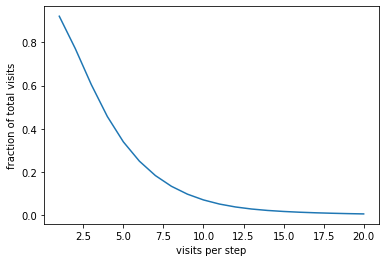

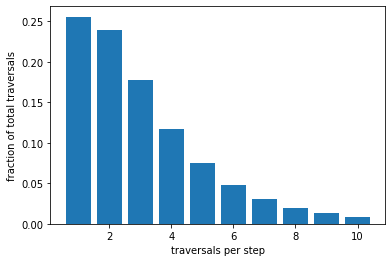

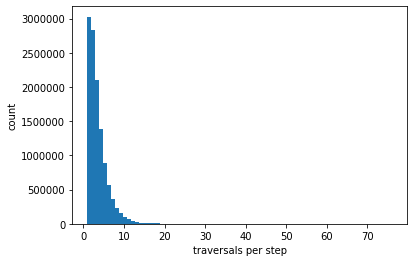

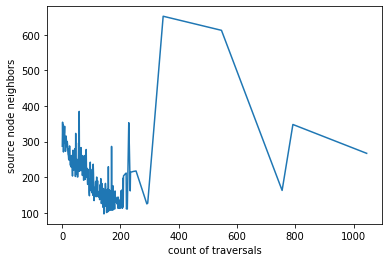

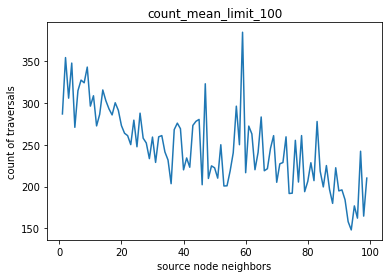

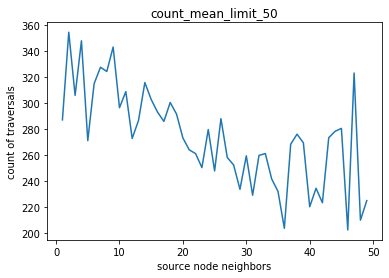

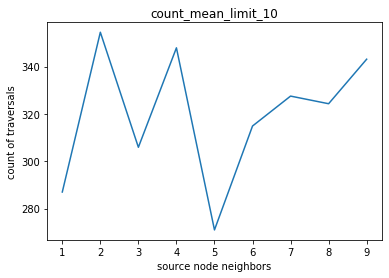

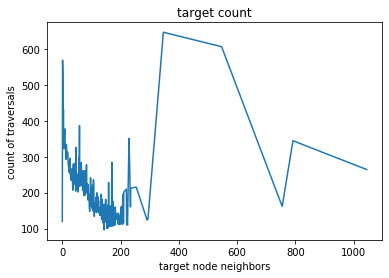

count mean
212.12318635842377
count max
2555
---  ---------  ---
 17  0.94275     86
 18  0.925028    91
 19  0.904347    96
 20  0.88001    101
 21  0.852842   106
 22  0.824494   111
 23  0.79567    116
 24  0.743256   121
 25  0.714255   126
 26  0.686411   131
 27  0.660335   136
 28  0.635266   141
 29  0.611323   146
 30  0.58842    151
 31  0.565862   156
 32  0.543885   161
 33  0.52239    166
 34  0.500673   171
 35  0.48007    176
 36  0.459683   181
 37  0.440864   186
 38  0.421762   191
 39  0.404156   196
 40  0.387093   201
 41  0.370911   206
 42  0.354939   211
 43  0.340075   216
 44  0.326691   221
 45  0.313423   226
 46  0.300836   231
 47  0.288947   236
 48  0.27769    241
 49  0.266981   246
 50  0.256771   251
 51  0.246866   256
 52  0.23701    261
 53  0.227958   266
 54  0.21905    271
 55  0.210862   276
 56  0.20238    281
 57  0.194835   286
 58  0.187217   291
 59  0.180137   296
 60  0.173749   301
 61  0.16719    306
 62  0.161406   311
 63  0.155684  

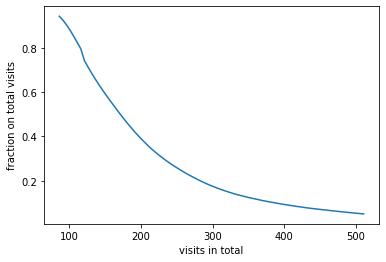

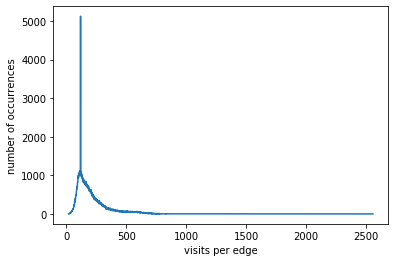

In [9]:
stats_analysis(df_80_131072)

--  ----------
 1  0.919919
 2  0.770465
 3  0.604317
 4  0.457065
 5  0.339773
 6  0.250547
 7  0.183896
 8  0.134246
 9  0.0978288
10  0.0714268
11  0.0524405
12  0.0390299
13  0.0296173
14  0.0229837
15  0.0183066
16  0.0148146
17  0.0121811
18  0.0100999
19  0.00832894
20  0.00694467
--  ----------
avg per step
3.1946655329205473
median per step
3.0


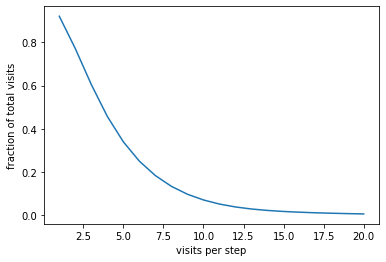

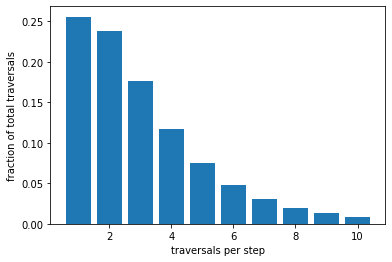

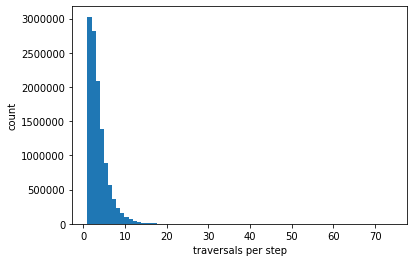

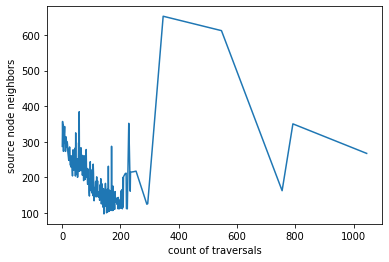

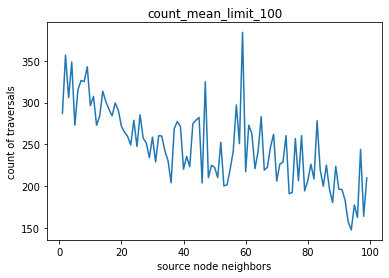

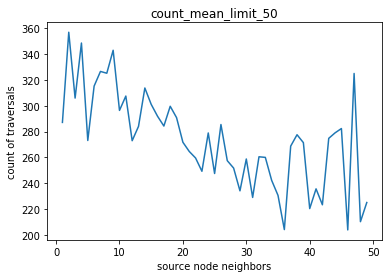

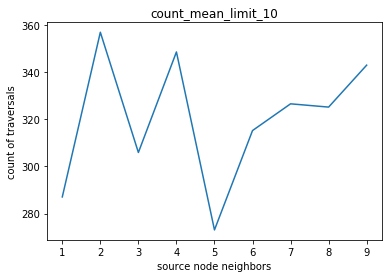

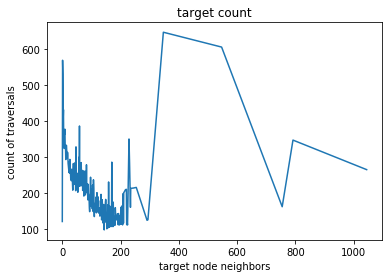

count mean
212.12318635842377
count max
2321
---  ---------  ---
 17  0.941587    86
 18  0.924197    91
 19  0.903012    96
 20  0.879273   101
 21  0.852133   106
 22  0.823165   111
 23  0.793393   116
 24  0.741439   121
 25  0.712682   126
 26  0.68558    131
 27  0.659504   136
 28  0.635244   141
 29  0.612397   146
 30  0.589772   151
 31  0.567208   156
 32  0.545131   161
 33  0.523287   166
 34  0.501931   171
 35  0.481001   176
 36  0.460569   181
 37  0.441429   186
 38  0.422637   191
 39  0.404732   196
 40  0.387387   201
 41  0.371919   206
 42  0.356673   211
 43  0.341582   216
 44  0.32771    221
 45  0.314315   226
 46  0.30216    231
 47  0.290233   236
 48  0.279092   241
 49  0.267907   246
 50  0.257586   251
 51  0.247276   256
 52  0.23762    261
 53  0.228529   266
 54  0.21931    271
 55  0.2112     276
 56  0.202795   281
 57  0.194979   286
 58  0.187328   291
 59  0.180464   296
 60  0.174165   301
 61  0.167794   306
 62  0.161562   311
 63  0.155933  

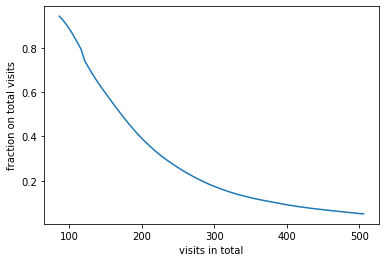

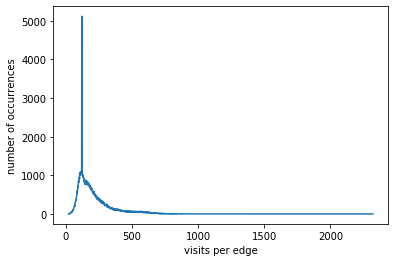

In [10]:
stats_analysis(df_80_65536)

--  ----------
 1  0.887204
 2  0.725619
 3  0.559672
 4  0.418213
 5  0.307668
 6  0.224896
 7  0.163527
 8  0.118565
 9  0.0860117
10  0.0626834
11  0.0461216
12  0.0346692
13  0.0264909
14  0.0206805
15  0.0164009
16  0.013217
17  0.0107257
18  0.00879194
19  0.00725009
20  0.00600397
--  ----------
avg per step
2.8974785357667354
median per step
2.0


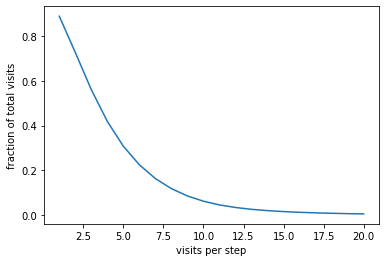

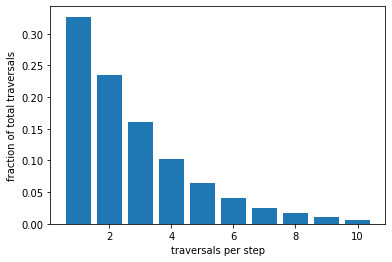

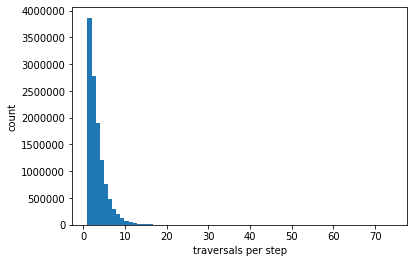

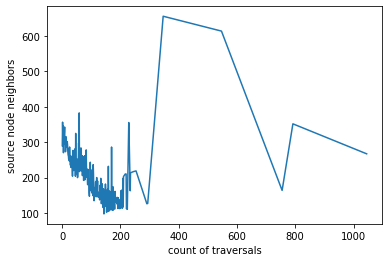

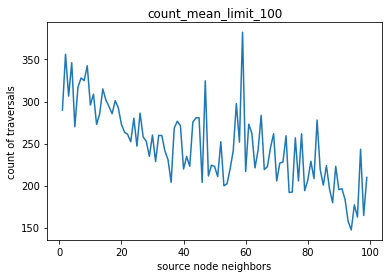

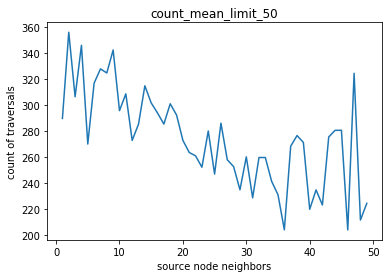

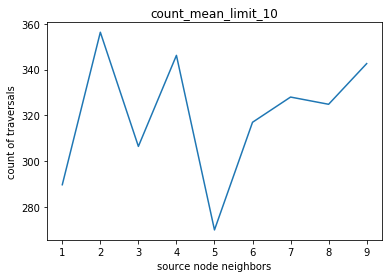

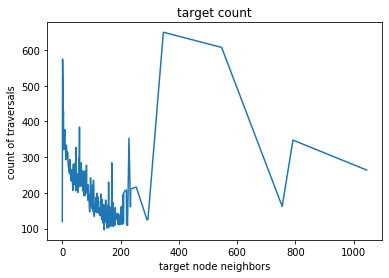

count mean
212.12318635842377
count max
2377
---  ---------  ---
 17  0.941094    86
 18  0.923405    91
 19  0.902635    96
 20  0.878614   101
 21  0.8519     106
 22  0.823336   111
 23  0.794069   116
 24  0.742115   121
 25  0.713767   126
 26  0.685979   131
 27  0.659925   136
 28  0.635842   141
 29  0.612591   146
 30  0.589046   151
 31  0.56646    156
 32  0.543885   161
 33  0.521891   166
 34  0.500922   171
 35  0.480397   176
 36  0.460038   181
 37  0.440354   186
 38  0.421546   191
 39  0.403519   196
 40  0.386672   201
 41  0.370606   206
 42  0.355327   211
 43  0.340873   216
 44  0.327106   221
 45  0.313606   226
 46  0.300914   231
 47  0.289257   236
 48  0.278034   241
 49  0.267109   246
 50  0.256854   251
 51  0.246993   256
 52  0.237487   261
 53  0.228096   266
 54  0.219144   271
 55  0.210812   276
 56  0.20253    281
 57  0.194602   286
 58  0.187084   291
 59  0.180264   296
 60  0.173877   301
 61  0.167473   306
 62  0.161584   311
 63  0.155922  

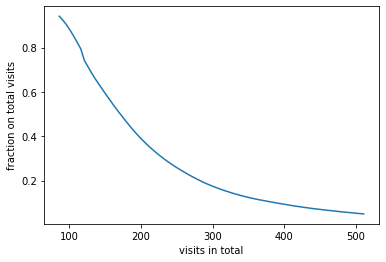

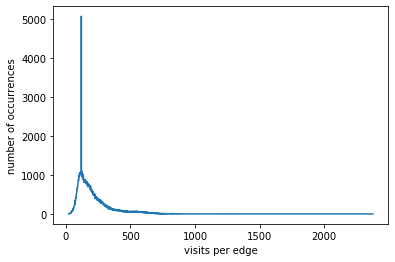

In [11]:
stats_analysis(df_80_2048)

--  ----------
 1  0.726437
 2  0.516707
 3  0.385678
 4  0.301667
 5  0.239418
 6  0.188414
 7  0.146056
 8  0.111954
 9  0.0853433
10  0.065426
11  0.0505531
12  0.0397255
13  0.0316866
14  0.0256005
15  0.020936
16  0.0172513
17  0.0143212
18  0.0118859
19  0.00988668
20  0.00819295
--  ----------
avg per step
2.066198094366701
median per step
1.0


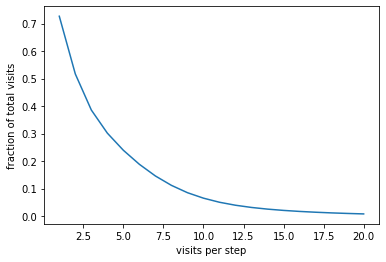

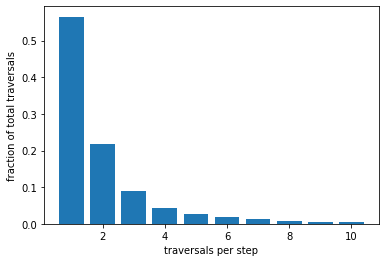

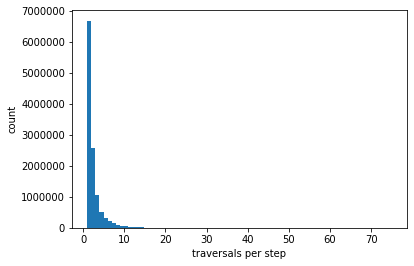

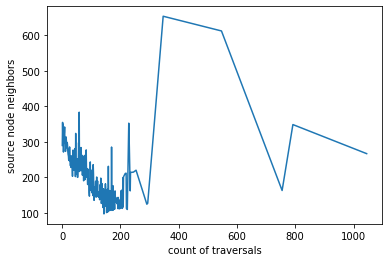

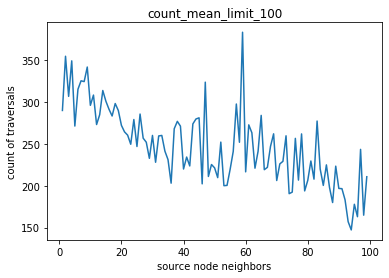

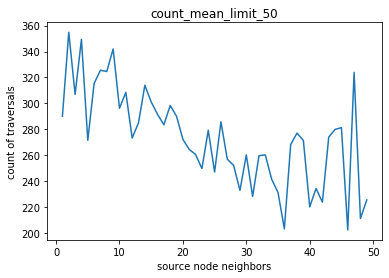

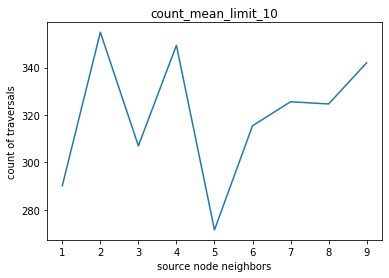

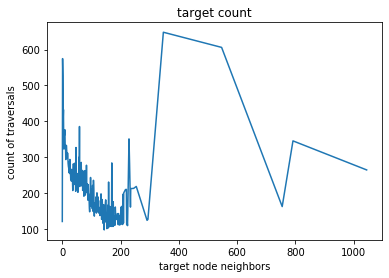

count mean
212.12318635842377
count max
2431
---  ---------  ---
 17  0.941565    86
 18  0.923792    91
 19  0.903311    96
 20  0.878969   101
 21  0.852017   106
 22  0.823364   111
 23  0.793299   116
 24  0.741268   121
 25  0.712659   126
 26  0.68589    131
 27  0.660611   136
 28  0.636324   141
 29  0.612846   146
 30  0.5896     151
 31  0.56697    156
 32  0.54481    161
 33  0.522628   166
 34  0.501377   171
 35  0.480441   176
 36  0.460326   181
 37  0.440349   186
 38  0.421579   191
 39  0.403497   196
 40  0.386362   201
 41  0.370584   206
 42  0.355183   211
 43  0.340945   216
 44  0.327239   221
 45  0.31406    226
 46  0.30154    231
 47  0.289956   236
 48  0.27836    241
 49  0.267408   246
 50  0.256705   251
 51  0.24701    256
 52  0.237769   261
 53  0.228362   266
 54  0.219432   271
 55  0.210895   276
 56  0.202912   281
 57  0.195045   286
 58  0.187671   291
 59  0.180613   296
 60  0.173849   301
 61  0.167606   306
 62  0.161733   311
 63  0.155944  

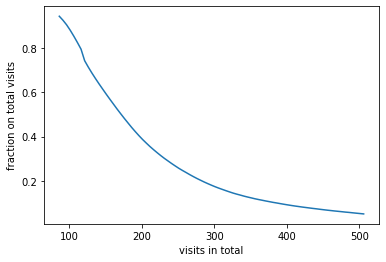

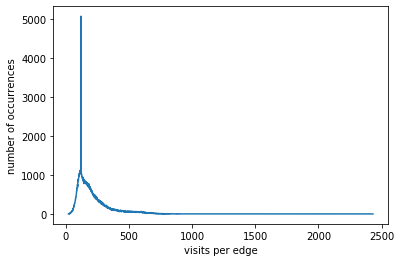

In [12]:
stats_analysis(df_80_512)

--  ---------
 1  0.385122
 2  0.182755
 3  0.112015
 4  0.0807907
 5  0.0647627
 6  0.0556517
 7  0.0498939
 8  0.045834
 9  0.042523
10  0.0395482
11  0.0366086
12  0.0336772
13  0.0306579
14  0.0275191
15  0.0244996
16  0.0214812
17  0.0185776
18  0.0158715
19  0.013546
20  0.0114818
--  ---------
avg per step
1.321860663582985
median per step
1.0


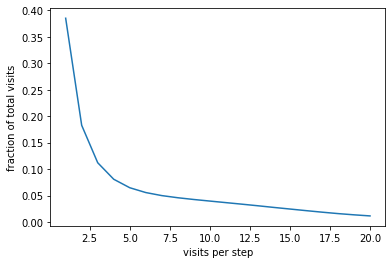

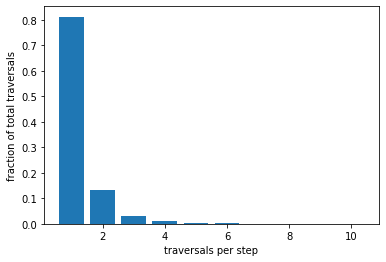

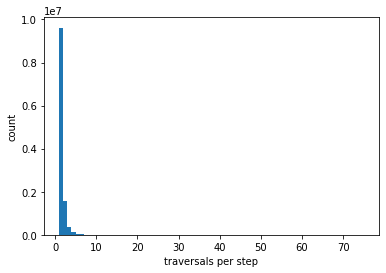

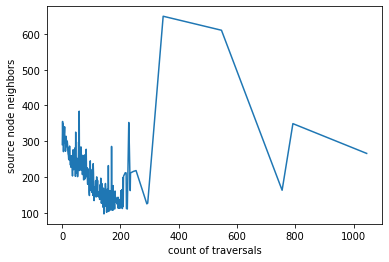

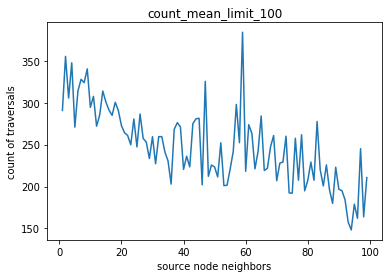

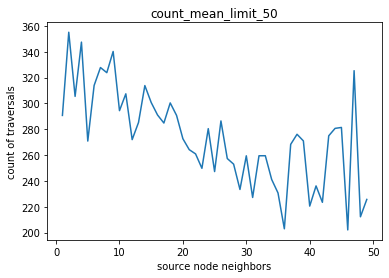

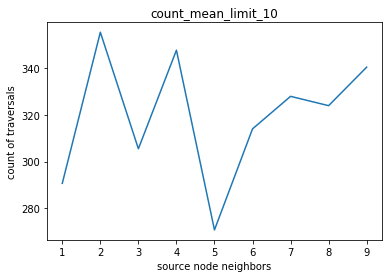

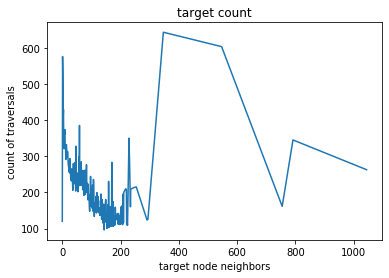

count mean
212.12318635842377
count max
2387
---  ---------  ---
 17  0.941653    86
 18  0.924335    91
 19  0.902973    96
 20  0.878476   101
 21  0.851912   106
 22  0.823093   111
 23  0.79295    116
 24  0.740919   121
 25  0.711889   126
 26  0.684882   131
 27  0.659387   136
 28  0.63418    141
 29  0.610929   146
 30  0.588642   151
 31  0.56625    156
 32  0.544106   161
 33  0.522379   166
 34  0.50162    171
 35  0.481073   176
 36  0.460159   181
 37  0.440975   186
 38  0.42225    191
 39  0.404372   196
 40  0.38722    201
 41  0.371288   206
 42  0.356324   211
 43  0.341444   216
 44  0.327921   221
 45  0.31473    226
 46  0.302459   231
 47  0.290631   236
 48  0.278876   241
 49  0.267846   246
 50  0.257574   251
 51  0.247564   256
 52  0.237791   261
 53  0.228661   266
 54  0.219537   271
 55  0.210817   276
 56  0.202552   281
 57  0.194873   286
 58  0.187865   291
 59  0.180802   296
 60  0.173954   301
 61  0.167661   306
 62  0.161551   311
 63  0.156138  

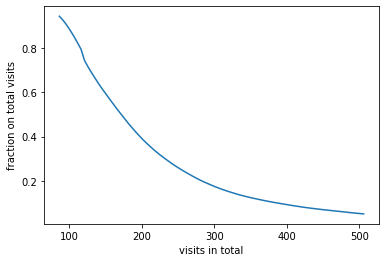

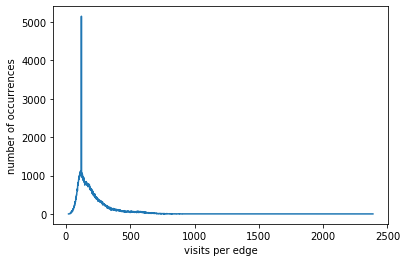

In [13]:
stats_analysis(df_80_128)

--  ----------
 1  0.115547
 2  0.0483457
 3  0.0353381
 4  0.0288475
 5  0.0242788
 6  0.0207265
 7  0.0179551
 8  0.015685
 9  0.0138219
10  0.0122714
11  0.0109703
12  0.00987543
13  0.00888394
14  0.00799725
15  0.00730942
16  0.00666478
17  0.0061171
18  0.00561057
19  0.00513548
20  0.00472474
--  ----------
avg per step
1.0784590487052845
median per step
1.0


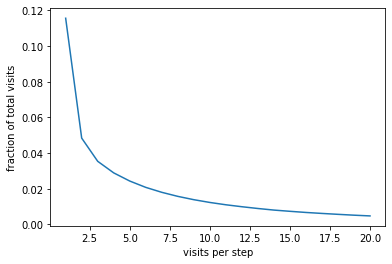

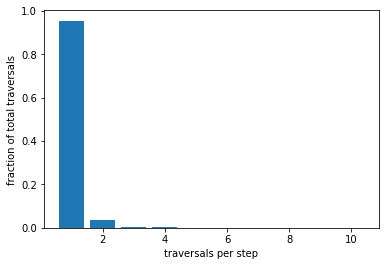

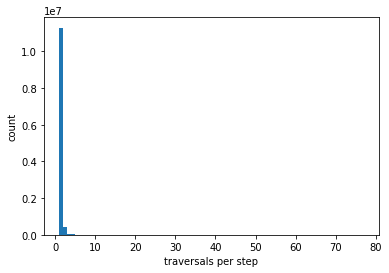

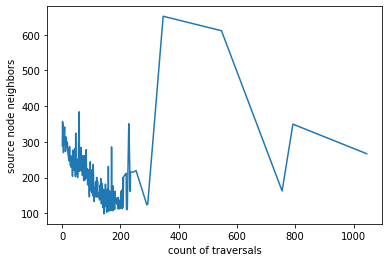

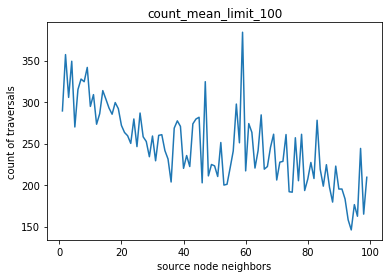

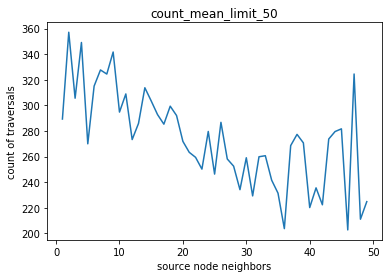

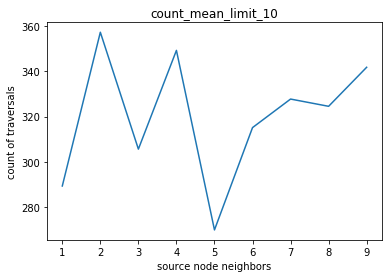

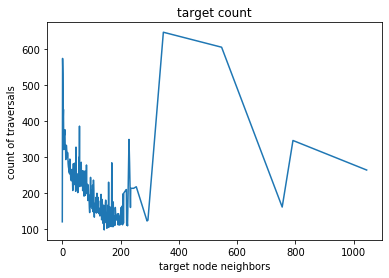

count mean
212.12318635842377
count max
2413
---  ---------  ---
 17  0.941853    86
 18  0.925022    91
 19  0.904214    96
 20  0.879711   101
 21  0.853213   106
 22  0.823802   111
 23  0.793919   116
 24  0.741539   121
 25  0.712305   126
 26  0.68481    131
 27  0.659066   136
 28  0.63397    141
 29  0.610364   146
 30  0.587717   151
 31  0.565402   156
 32  0.543491   161
 33  0.521686   166
 34  0.500695   171
 35  0.479771   176
 36  0.459733   181
 37  0.440005   186
 38  0.421563   191
 39  0.404344   196
 40  0.387187   201
 41  0.371448   206
 42  0.355731   211
 43  0.341261   216
 44  0.3274     221
 45  0.314232   226
 46  0.301916   231
 47  0.289839   236
 48  0.278377   241
 49  0.267679   246
 50  0.257048   251
 51  0.24732    256
 52  0.237503   261
 53  0.228146   266
 54  0.219559   271
 55  0.210784   276
 56  0.202325   281
 57  0.194779   286
 58  0.187383   291
 59  0.180386   296
 60  0.173561   301
 61  0.167312   306
 62  0.161013   311
 63  0.155601  

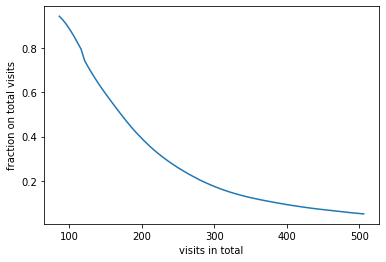

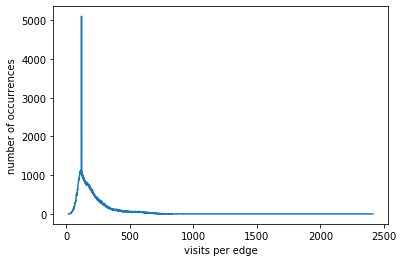

In [14]:
stats_analysis(df_80_16)

In [ ]:
with open("data/stats.json") as datafile:
    data = json.load(datafile)


In [ ]:
df = pd.read_json("data/stats.json")

In [ ]:
df = df128

In [ ]:
df.index.values

In [ ]:
df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)

In [ ]:
df2.loc['(1096, 107)']

In [ ]:
df3 = df2.loc[~df2.index.str.contains("None")]

In [ ]:
df4 = df2.loc[df2.index.str.contains("None")]

In [ ]:
df3

In [ ]:
df3

In [ ]:
df3.time_access.values.tolist()

In [ ]:
df_time_access = pd.DataFrame(df3.time_access.values.tolist(), index=df3.index.values)

In [ ]:
df3.time_access.values.tolist()

In [ ]:
df_time_access = df_time_access.fillna(0)

In [ ]:
df_time_access.idxmax()

In [ ]:
counts = df_time_access.values.flatten()


In [ ]:
counts2 = counts[(counts>0) & (counts<120)]

In [ ]:
len(counts2[counts2==1])/len(counts2)

In [ ]:
ratios = []
for i in range(1, 11):
    ratios.append(len(counts2[counts2==i])/len(counts2))

In [ ]:
step_groupings = []
for i in range(1, 21):
    step_groupings.append((i, sum(counts2[counts2>i])/sum(counts2)))

In [ ]:
step_groupings = np.array(step_groupings)
l1, l2 = zip(*step_groupings)

In [ ]:
step_groupings

In [ ]:


step_groupings_pd = pd.DataFrame()
step_groupings_pd['bound'] = l1
step_groupings_pd['fraction'] = l2

plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

In [ ]:
plt.bar(range(1,11), np.array(ratios))
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

In [ ]:
plt.hist(counts2, bins=int(max(counts2)))
plt.xlabel("traversals per step")
plt.ylabel("count")

In [ ]:
plt.plot(df2.groupby('source_neighbors').mean()['count'])
plt.xlabel("count of traversals")
plt.ylabel("source node neighbors")

In [ ]:
count_mean = df2.groupby('source_neighbors').mean()['count']

In [ ]:
count_mean

In [ ]:
count_mean_limit_100 = count_mean[count_mean.index < 100]
count_mean_limit_50 = count_mean[count_mean.index < 50]
count_mean_limit_10 = count_mean[count_mean.index < 10]

In [ ]:
plt.plot(count_mean_limit_100)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(count_mean_limit_50)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(count_mean_limit_10)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(df2.groupby('target_neighbors').mean()['count'])
plt.ylabel("count of traversals")
plt.xlabel("target node neighbors")

In [ ]:
df2['count'].mean()

In [ ]:
df2['count'].median()

In [ ]:
max(df2['count'])

In [ ]:
df2['count']

In [ ]:
count_groups = df2.groupby('count').size()


In [ ]:
count_groups

In [ ]:
groupings_percentages = []
for i in range(1, max(df2['count']), 5):
    groupings_percentages.append((i, sum(count_groups[count_groups.index >= i])/sum(count_groups)))

In [ ]:
groupings_percentages = np.array(groupings_percentages)
l1, l2 = zip(*groupings_percentages)


In [ ]:
pd_groupings = pd.DataFrame()
pd_groupings['fraction'] = l2
pd_groupings['bound'] = l1

In [ ]:
max(count_groups)

In [ ]:
pd_groupings

In [ ]:
pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]

In [ ]:
pd_groupings_sig

In [ ]:
plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
plt.xlabel("visits in total")
plt.ylabel("fraction on total visits")

In [ ]:
plt.plot(df2.groupby('count').size())

In [ ]:
count_groups = df2.groupby('count').size()
count_groups_500 = count_groups[count_groups < 500]

In [ ]:
count_groups[count_groups < 10]

In [ ]:
bins = range(0, max(df2['count']), 10)
pd.cut(count_groups, bins)

In [ ]:
plt.plot(count_groups_500)

In [ ]:
cut_df = pd.cut(count_groups, bins).to_frame()

In [ ]:
cut_df.groupby(0).size().head(20)